<a href="https://colab.research.google.com/github/Sagar856/Data-Science-Assignments/blob/main/Assignment_13_KNN_ZooDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**
# Implement a KNN model to classify the animals into categories

## 1. Introduction:<a class="anchor" id="1"></a>
K Nearest Neighbor algorithm falls under the Supervised Learning category and is used for classification (most commonly) and regression. It is a versatile algorithm also used for imputing missing values and resampling datasets. As the name (K Nearest Neighbor) suggests it considers K Nearest Neighbors (Data points) to predict the class or continuous value for the new Datapoint.

The algorithm’s learning is:

1. Instance-based learning: Here we do not learn weights from training data to predict output (as in model-based algorithms) but use entire training instances to predict output for unseen data.

2. Lazy Learning: Model is not learned using training data prior and the learning process is postponed to a time when prediction is requested on the new instance.

3. Non -Parametric: In KNN, there is no predefined form of the mapping function.

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score, train_test_split


In [ ]:
# Importing Dataset
zoo = pd.read_csv('/content/Zoo.csv')
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


## 2. Data Exploration <a class="anchor" id="2"></a>

In [ ]:
zoo.shape

(101, 18)

In [ ]:
# Checking null values
zoo.isnull().any()

animal name    False
hair           False
feathers       False
eggs           False
milk           False
airborne       False
aquatic        False
predator       False
toothed        False
backbone       False
breathes       False
venomous       False
fins           False
legs           False
tail           False
domestic       False
catsize        False
type           False
dtype: bool

### 2.1 Descriptive Analysis<a class="anchor" id="2.1"></a>

In [ ]:
zoo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


In [ ]:
zoo.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
# Checking for duplicate values
zoo[zoo.duplicated()]

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type


In [ ]:
zoo.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'type'],
      dtype='object')

In [ ]:
zoo.type.unique()

array([1, 4, 2, 7, 6, 5, 3])

From this we can see that all of the animal characteristics or feature values are given as binary values (1- present / 0-absent) except for the legs where it is given as a count of legs.

We need to keep this in mind going forward while using the data.

Next let's get the distribution of animal data across the types of classes.

## 3. Data Visualization<a class="anchor" id="3"></a>

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<ipython-input-107-66be90a5e292>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(zoo.corr(), annot=True, fmt='.1g', cmap='viridis', cbar=False, linewidth=0.5)


<Axes: >

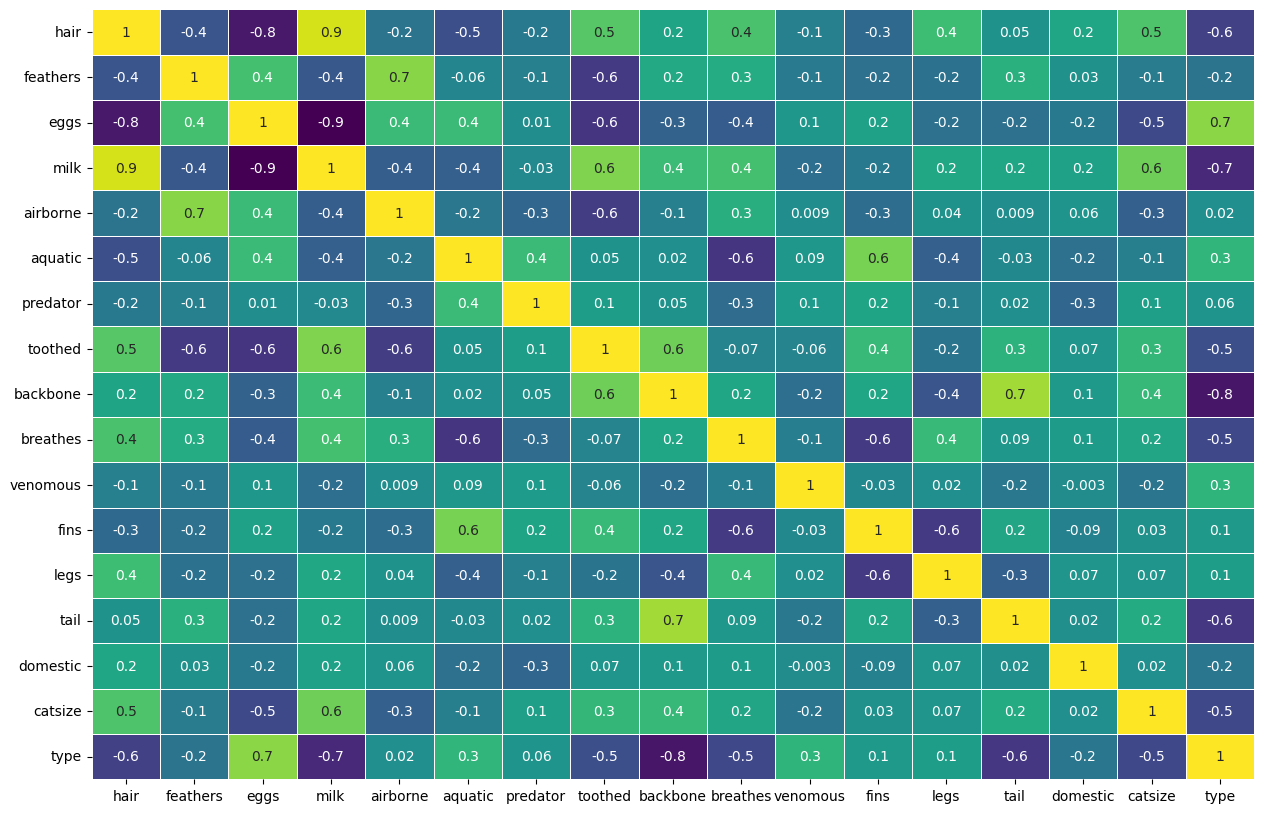

In [ ]:
# Correlation Matrix
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(zoo.corr(), annot=True, fmt='.1g', cmap='viridis', cbar=False, linewidth=0.5)

We can also see if there are any trends or correlations in the data using a heatmap.

As mentioned previously, we will want to treat the legs columns differently as it does not present data the same way as the remaining columns. So, we will create a column has_legs that checks if an animal has legs (1) or not (0).

In [ ]:
zoo.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


In [ ]:
zoo_df = zoo.copy()
zoo_df['has_legs'] = np.where(zoo_df['legs']>0,1,0)
zoo_df = zoo_df[['animal name','hair','feathers','eggs','milk', 'airborne', 'aquatic', 'predator', 'toothed', 'backbone', 'breathes','venomous','fins','legs','has_legs','tail','domestic','catsize','type']]
zoo_df.head()

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1,1


Text(0.5, 1.0, 'Features for animals')

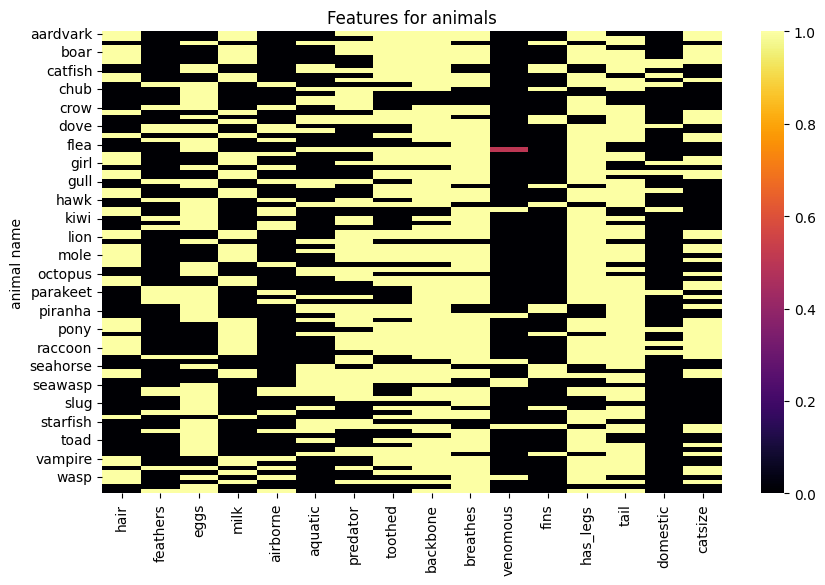

In [ ]:
zoo_df_temp = zoo_df.drop(['legs','type'], axis=1)
zoo_df_temp = zoo_df_temp.groupby(by = 'animal name').mean()
plt.rcParams['figure.figsize']=(10,6)
sns.heatmap(zoo_df_temp, cmap='inferno')
ax = plt.gca()
ax.set_title('Features for animals')

In [ ]:
zoo = zoo_df.copy()
zoo['Class_Types'] = zoo['type'].map({1:'Mammal', 2:'Bird',3:'Reptile',4:'Fish',5:'Amphibian',6:'Bug',7:'Invertebrate'})

In [ ]:
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize,type,Class_Types
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1,1,Mammal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,1,0,1,1,Mammal
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,1,0,0,0,6,Bug
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1,1,Mammal
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,7,Invertebrate


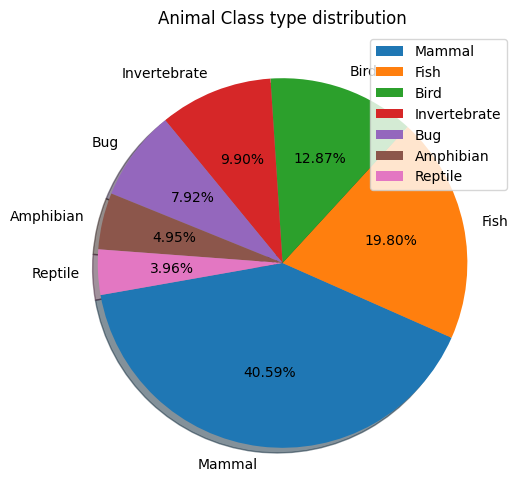

In [ ]:
plt.figure(figsize = (10,6))
plt.pie(zoo.type.value_counts(),
        labels = zoo.Class_Types.unique(),
        explode = [0.0,0.0,0.0,0.0,0.0,0.0,0.0],
        autopct = '%.2f%%',
        shadow = True, startangle = 190,
        )

plt.legend(loc='upper right')
plt.title('Animal Class type distribution')
plt.show()


## 4. Data Pre-Processing<a class="anchor" id="4"></a>

In [ ]:
zoo.drop(['Class_Types', 'animal name'],axis= 1, inplace=True)
zoo.head(1)

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,has_legs,tail,domestic,catsize,type
0,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1,1


In [ ]:
zoo.rename({'type':'class_type'},axis=1,inplace=True)
zoo.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs',
       'has_legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [ ]:
x = zoo.drop('class_type', axis=1)
y = zoo[['class_type']]

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=0)

In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (70, 17)
Shape of X_test:  (31, 17)
Shape of y_train:  (70, 1)
Shape of y_test (31, 1)


## 5. How to choose the value for K?<a class="anchor" id="5"></a>
K is a crucial parameter in the KNN algorithm.

### 5.1 Grid search for choosing the best Value of K<a class="anchor" id="5.1"></a>

In [ ]:
# Get score for different values of n
k_list = np.arange(1,45, 2)
mean_scores = []
accuracy_score = []
error_rate = []

for i in k_list:
  knn = KNeighborsClassifier(n_neighbors=1)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  pred_i = pred_i.reshape(31,1)
  score = cross_val_score(knn, x_train,y_train, cv = 10)
  mean_scores.append(np.mean(score))
  error_rate.append(np.mean(pred_i != y_test))

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3

In [ ]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = {'n_neighbors':n_neighbors}
param_grid

{'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
        37, 39])}

In [ ]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator = model, param_grid=param_grid,cv = 10)
grid.fit(x,y)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [ ]:
print(grid.best_score_)
print(grid.best_params_)

0.95
{'n_neighbors': 3}


It is recommended to always select an odd value of K ~
When the value of K is set to even, a situation may arise in which the elements from both groups are equal. In the diagram below, elements from both groups are equal in the internal “Red” circle (k == 4).

In this condition, the model would be unable to do the correct classification for you. Here the model will randomly assign any of the two classes to this new unknown data.

Choosing an odd value for K is preferred because such a state of equality between the two classes would never occur here. Due to the fact that one of the two groups would still be in the majority, the value of K is selected as odd.

![image.png](attachment:image.png)

### 5.2 Visualizing the CV results<a class="anchor" id="5.2"></a>

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3

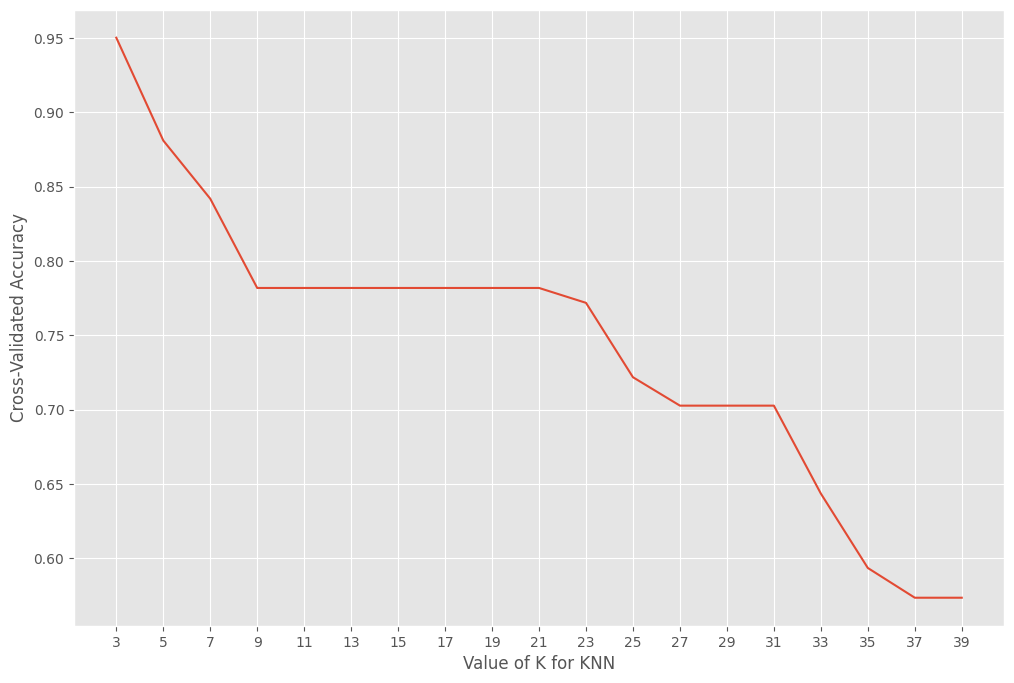

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 40
k_range = np.array([2*i+1 for i in range(1,20)])
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x, y, cv=10)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(12,8))
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.xticks(k_range)
plt.show()

In [ ]:
pd.DataFrame(k_scores).sort_values(0,ascending=False).head(10)

,0
0,0.950000
1,0.880909
2,0.841818
6,0.781818
8,0.781818
7,0.781818
9,0.781818
5,0.781818
4,0.781818
3,0.781818


##### We can either take K = 9 or 3

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar m

Text(0, 0.5, 'Error rate')

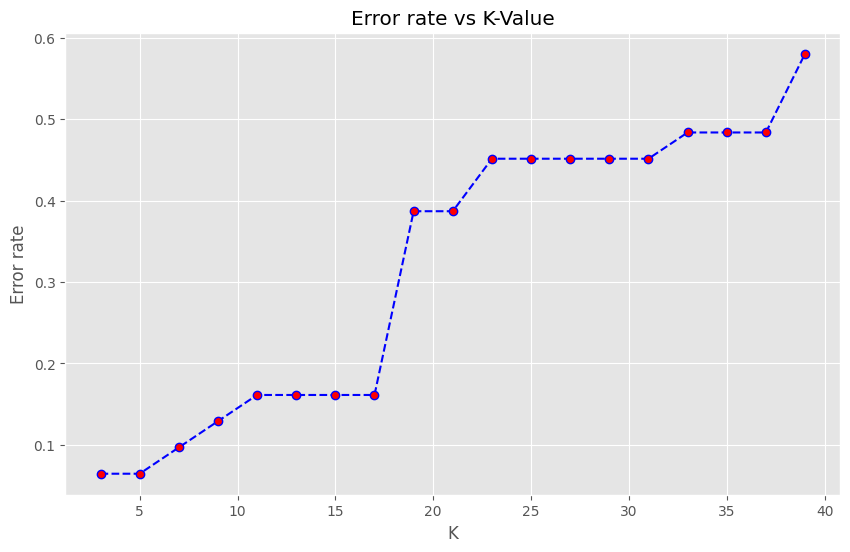

In [ ]:
# Error rate

error_rate = []

k_range = [i for i in range(3,40,2)]
for i in k_range:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(x_train,y_train)
  pred_i = knn.predict(x_test)
  pred_i = pred_i.reshape(31,1)
  error_rate.append(np.mean(pred_i != y_test))

# Plot
plt.figure(figsize=(10,6))
plt.plot([i for i in range(3,40,2)], error_rate, color='blue', linestyle = 'dashed', marker='o', markerfacecolor='red')
plt.title('Error rate vs K-Value')
plt.xlabel('K')
plt.ylabel('Error rate')

Here we can see that that after K>3 the error rate just tends to hover around 0-0.5 Let's retrain the model with that and check the classification report!

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWa

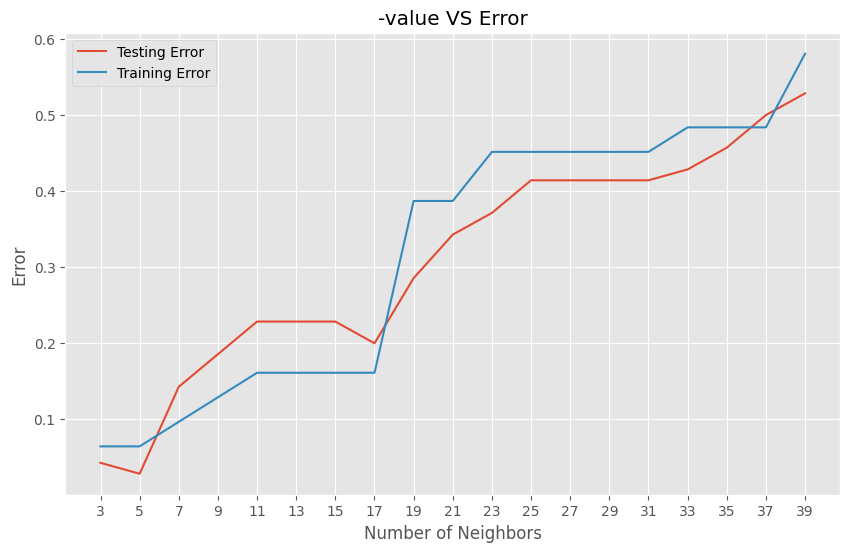

In [ ]:
error1= []
error2= []
k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn= KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    y_pred1= knn.predict(x_train)
    y_pred1 = y_pred1.reshape(70,1)
    error1.append(np.mean(y_train!= y_pred1))
    y_pred2= knn.predict(x_test)
    y_pred2 = y_pred2.reshape(31,1)
    error2.append(np.mean(y_test!= y_pred2))
# Plot
plt.figure(figsize=[10,6])
plt.plot(k_range, error1, label = 'Testing Error')
plt.plot(k_range, error2, label = 'Training Error')
plt.legend()
plt.title('-value VS Error')
plt.xlabel('Number of Neighbors')
plt.ylabel('Error')
plt.xticks(k_range)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

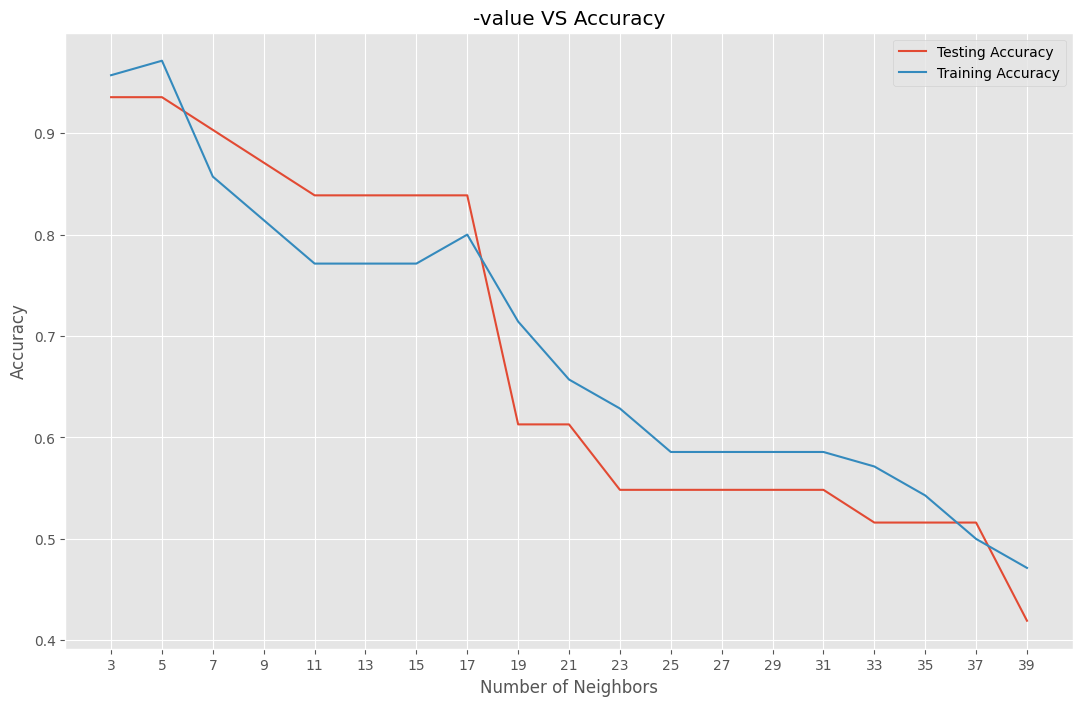

In [ ]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(3,40, 2)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(x_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(x_train,y_train))
    # test accuracy
    test_accuracy.append(knn.score(x_test,y_test))
# Plot
plt.figure(figsize=[13,8])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('-value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(k_range)
plt.savefig('graph.png')
plt.show()

The impact of selecting a smaller or larger K value on the model

+ Larger K value: The case of underfitting occurs when the value of k is increased. In this case, the model would be unable to correctly learn on the training data.

+ Smaller k value: The condition of overfitting occurs when the value of k is smaller. The model will capture all of the training data, including noise. The model will perform poorly for the test data in this scenario.

![image.png](attachment:image.png)

##### The best value of K is 3 or 5 lets check for these value in classifiaction Report

### 6. Applying KNN<a class="anchor" id="6"></a>

#### How does KNN Work?
1. Principle:
Consider the following figure. Let us say we have plotted data points from our training set on a two-dimensional feature space. As shown, we have a total of 6 data points (3 red and 3 blue). Red data points belong to ‘class1’ and blue data points belong to ‘class2’. And yellow data point in a feature space represents the new point for which a class is to be predicted. Obviously, we say it belongs to ‘class1’ (red points)

Why?

Because its nearest neighbors belong to that class!

![image.png](attachment:image.png)

Yes, this is the principle behind K Nearest Neighbors. Here, nearest neighbors are those data points that have minimum distance in feature space from our new data point. And K is the number of such data points we consider in our implementation of the algorithm. Therefore, distance metric and K value are two important considerations while using the KNN algorithm. Euclidean distance is the most popular distance metric. You can also use Hamming distance, Manhattan distance, Minkowski distance as per your need. For predicting class/ continuous value for a new data point, it considers all the data points in the training dataset. Finds new data point’s ‘K’ Nearest Neighbors (Data points) from feature space and their class labels or continuous values.

### Predictions and Evaluations<a class="anchor" id="6.1"></a>
Let's evaluate our KNN model!

#### 1. Confusion Matrix

The confusion matrix is a technique used for summarizing the performance of a classification algorithm i.e. it has binary outputs.
![](https://cdn-images-1.medium.com/max/1600/0*-GAP6jhtJvt7Bqiv.png)



#### ***In the famous cancer example***:


###### Cases in which the doctor predicted YES (they have the disease), and they do have the disease will be termed as TRUE POSITIVES (TP). The doctor has correctly predicted that the patient has the disease.

###### Cases in which the doctor predicted NO (they do not have the disease), and they don’t have the disease will be termed as TRUE NEGATIVES (TN). The doctor has correctly predicted that the patient does not have the disease.

###### Cases in which the doctor predicted YES, and they do not have the disease will be termed as FALSE POSITIVES (FP). Also known as “Type I error”.

###### Cases in which the doctor predicted NO, and they have the disease will be termed as FALSE NEGATIVES (FN). Also known as “Type II error”.

For Reference: https://medium.com/@djocz/confusion-matrix-aint-that-confusing-d29e18403327

#### 2. Classification Report

Report which includes Precision, Recall and F1-Score.


#### Precision Score
        TP – True Positives
        FP – False Positives

        Precision – Accuracy of positive predictions.
        Precision = TP/(TP + FP)
        
   
#### Recall Score
        FN – False Negatives

        Recall(sensitivity or true positive rate): Fraction of positives that were correctly identified.
        Recall = TP/(TP+FN)
        
#### F1 Score
        F1 Score (aka F-Score or F-Measure) – A helpful metric for comparing two classifiers.
        F1 Score takes into account precision and the recall.
        It is created by finding the the harmonic mean of precision and recall.

        F1 = 2 x (precision x recall)/(precision + recall)
        
        
        
> > ***Precision*** - Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. The question that this metric answer is of all passengers that labeled as survived, how many actually survived? High precision relates to the low false positive rate. We have got 0.788 precision which is pretty good.
> >
> > Precision = TP/TP+FP
> >
> > ***Recall (Sensitivity)*** - Recall is the ratio of correctly predicted positive observations to the all observations in actual class - yes. The question recall answers is: Of all the passengers that truly survived, how many did we label? A recall greater than 0.5 is good.
> >
> > Recall = TP/TP+FN
> >
> > ***F1 score*** - F1 Score is the weighted average of Precision and Recall. Therefore, this score takes both false positives and false negatives into account. Intuitively it is not as easy to understand as accuracy, but F1 is usually more useful than accuracy, especially if you have an uneven class distribution. Accuracy works best if false positives and false negatives have similar cost. If the cost of false positives and false negatives are very different, it’s better to look at both Precision and Recall.
> >
> > F1 Score = 2*(Recall * Precision) / (Recall + Precision)
        
        
For Reference: http://joshlawman.com/metrics-classification-report-breakdown-precision-recall-f1/
                        : https://blog.exsilio.com/all/accuracy-precision-recall-f1-score-interpretation-of-performance-measures/

#### 6.2 Applying KNN using K=3<a class="anchor" id="6.2"></a>

In [ ]:
# Now with k=3
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(x_train, y_train)
pred = knn.predict(x_test)

print('With k=3')
print()
print(confusion_matrix(y_test, pred))
print()
print(classification_report(y_test, pred))

With k=3

[[11  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.78      1.00      0.88         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.83      0.86      0.84        31
weighted avg       0.89      0.94      0.91        31



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision

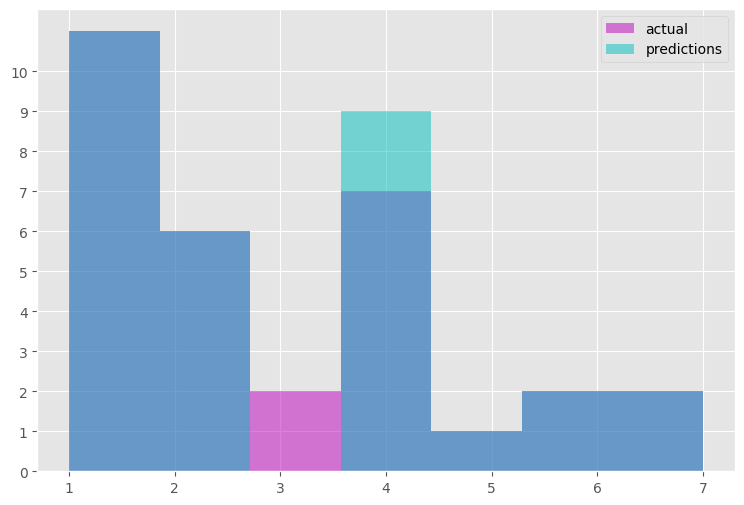

In [ ]:
plt.rcParams['figure.figsize'] = (9,6)
_, ax = plt.subplots()
ax.hist(y_test, color='m', alpha=0.5, label='actual',bins=7)
ax.hist(pred, color='c', alpha=0.5,label = 'predictions', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc='best')
plt.show()

In [ ]:
# Applying with K=5
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=5


[[11  0  0  0  0  0  0]
 [ 0  6  0  0  0  0  0]
 [ 0  0  0  2  0  0  0]
 [ 0  0  0  7  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00         6
           3       0.00      0.00      0.00         2
           4       0.78      1.00      0.88         7
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           0.94        31
   macro avg       0.83      0.86      0.84        31
weighted avg       0.89      0.94      0.91        31



/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision

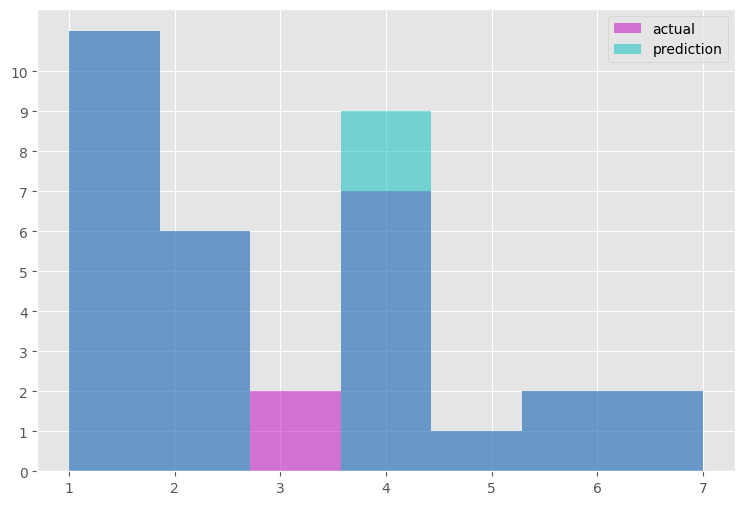

In [ ]:
plt.rcParams['figure.figsize'] = (9,6)
_, ax = plt.subplots()
ax.hist(y_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')
plt.show()

What this figure tells us is the total number of animals in each class according to the test data and predicted data.
We can see that the predictions matches almost all the actual animal classifications (indicated by color overlap) except for one case where the model failed to identify an animal as belonging to class 3 (Reptile), and marked it as being in class 4 (Fish).

So we can see the level of accuracy for this particular classifier.

Now that we know what the model can do at n=5, we should run the model for multiple values of n to find optimal value of n with respect to this dataset.

So, we've seen how this works when we use all the features values as given.
Just for fun, let's see how this changes if we don't use the values for legs and use has_legs instead as we did when plotting our heatmap.

I'll run the exact same code as before changing nothing but using has_legs and not legs.

In [ ]:
zoo_df.columns

Index(['animal name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'has_legs', 'tail', 'domestic', 'catsize', 'type',
       'Class_Types'],
      dtype='object')

In [ ]:
zoo.columns

Index(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'predator',
       'toothed', 'backbone', 'breathes', 'venomous', 'fins', 'legs',
       'has_legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [ ]:
# Select columns to add to X and y sets
features = list(zoo.columns.values)
features.remove('legs')
features.remove('class_type')
X2 = zoo[features]
y2 = zoo['class_type']
# Split X and y into train and test
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state = 0)

In [ ]:
X2_train.shape, y2_train.shape

((75, 16), (75,))

In [ ]:
# NOW WITH K=5
knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X2_train,y2_train)
pred = knn.predict(X2_test)

print('WITH K=5')
print('\n')
print(confusion_matrix(y2_test,pred))
print('\n')
print(classification_report(y2_test,pred))

WITH K=5


[[10  0  0  0  0  0  0]
 [ 0  5  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  0  5  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  2  0]
 [ 0  0  0  0  0  0  2]]


              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         2

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26



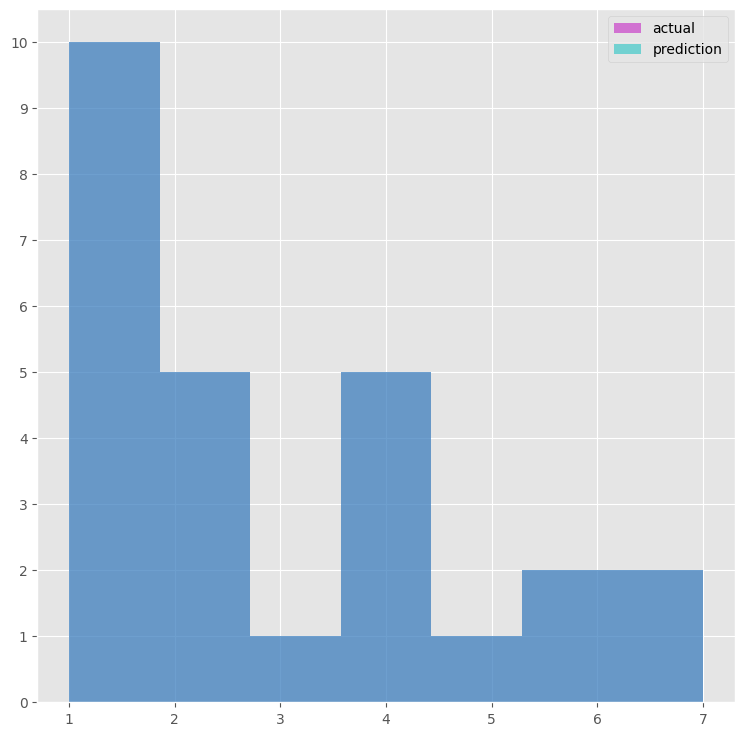

In [ ]:
plt.rcParams['figure.figsize'] = (9,9)
_, ax = plt.subplots()
ax.hist(y2_test, color = 'm', alpha = 0.5, label = 'actual', bins=7)
ax.hist(pred, color = 'c', alpha = 0.5, label = 'prediction', bins=7)
ax.yaxis.set_ticks(np.arange(0,11))
ax.legend(loc = 'best')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=10.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/

ValueError: x and y must have same first dimension, but have shapes (20,) and (22,)

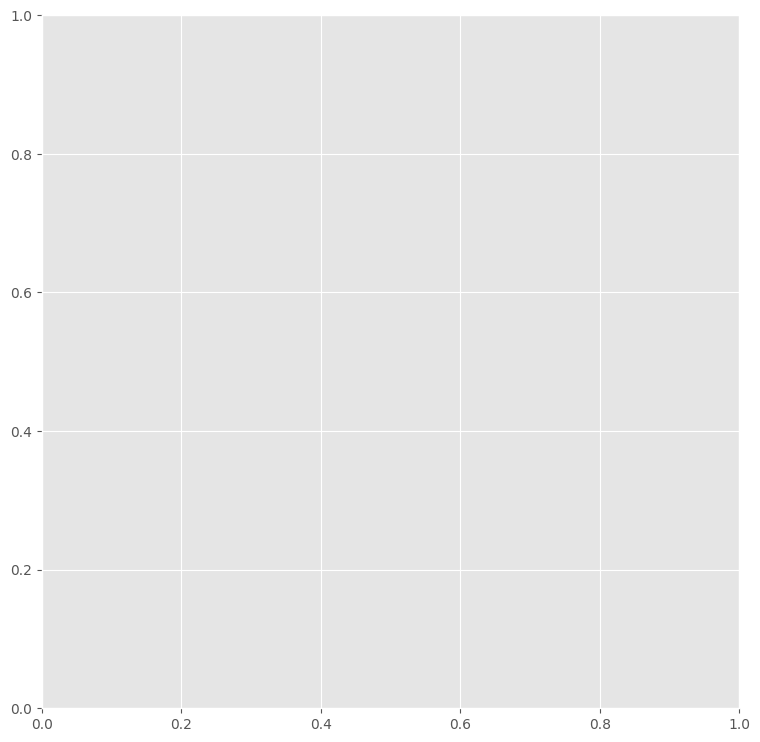

In [ ]:
# Get score for different values of n
k_list = np.arange(1, 40, 2)
mean_scores2 = []
accuracy_list2 = []
error_rate2 = []

for i in k_list:
    knn2 = KNeighborsClassifier(n_neighbors=i)
    knn2.fit(X2_train,y2_train)
    pred_i = knn2.predict(X2_test)
    score = cross_val_score(knn2,X2_train, y2_train,cv=10)
    mean_scores2.append(np.mean(score))
    error_rate2.append(np.mean(pred_i != y2_test))

# Plot n values and average accuracy scores
plt.plot(k_list,mean_scores, color='b',marker='o', label='Model using Number of Legs')
plt.plot(k_list,mean_scores2, color='m',marker='x', label='Model using Presence of Legs')

# Added titles and adjust dimensions
plt.title('Accuracy of Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Mean Accuracy Score")
plt.xticks(k_list)
plt.legend()
plt.rcParams['figure.figsize'] = (12,12)

plt.show()

ValueError: x and y must have same first dimension, but have shapes (20,) and (19, 1)

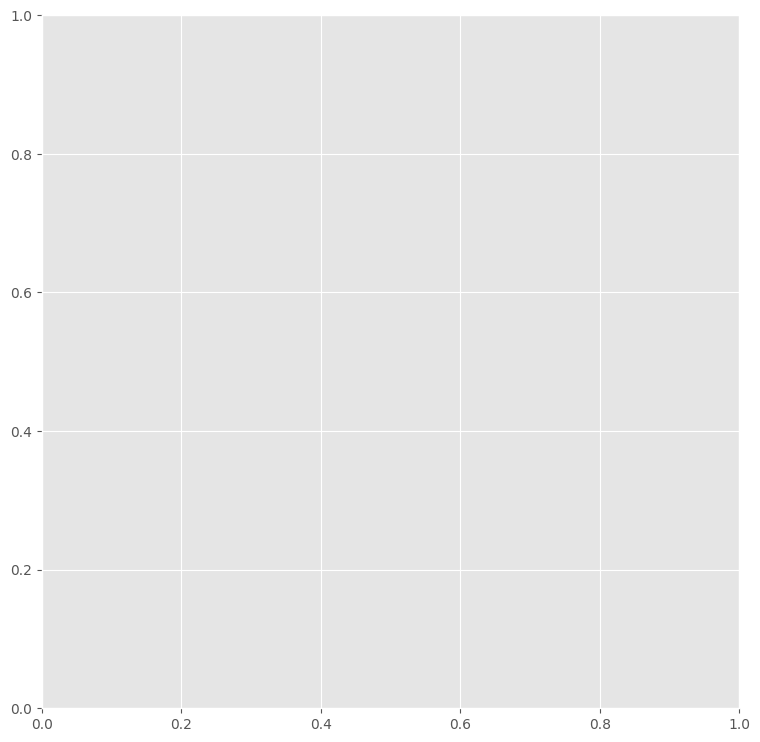

In [ ]:
# Plot n values and average accuracy scores
plt.plot(k_list,error_rate, color='r', marker = 'o', label='Model using Number of Legs')
plt.plot(k_list,error_rate2, color='c', marker = 'x', label='Model using Presence of Legs')

# Added titles and adjust dimensions
plt.title('Error Rate for Model for Varying Values of K')
plt.xlabel("Values of K")
plt.ylabel("Error Rate")
plt.xticks(k_list)
plt.legend()
plt.rcParams['figure.figsize'] = (12,12)

plt.show()

## Inference<a class="anchor" id="7"></a>
### So interestingly,
**`Replacing the feature legs with has_legs improved the accuracy of KNN models at every value where n >3
This may be due to the model taking the number of legs as a continuous, numeric data point rather than as an enumerate.`**